In [1]:
#
#NA-37
#
%matplotlib inline
from pylab import *;import scipy as sp;import numpy as np;import matplotlib.pyplot as plt;
import matplotlib.patches as mpatches;import matplotlib.mlab as mlab;from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable;from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
name0 = '37';name1 = 'na'+name0;name2 = 'na-'+name0
#----------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('../banco_de_dados_original/NA37D.dat', dtype=float, count=-1, sep='	');alph=len(data)/1313
p = int (len(data)/alph)

print (len(data),'- comprimento original antes da divisão');print (p,'- comprimento de uma unica coluna')
print (alph,'- número de colunas');data  = np.reshape(data, (len(data)/alph,alph))
#----------------------------------------As propriedades petrofisicas do poco-------------------------------------#
prof=np.array(data[:,0],float);DTP=np.array(data[:,1],float);GR=np.array(data[:,2],float)
ILD  = np.array(data[:,3],float);PHIN = np.array(data[:,4],float);RHOb = np.array(data[:,5],float)
print ();print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]);print(prof[162],prof[876],prof[1007]);del(data,alph)

7878 - comprimento original antes da divisão
1313 - comprimento de uma unica coluna
6.0 - número de colunas

2950.0556 112.8538 130.5972 1.4605 32.728 2.4211
2974.7444 3083.558 3103.5224


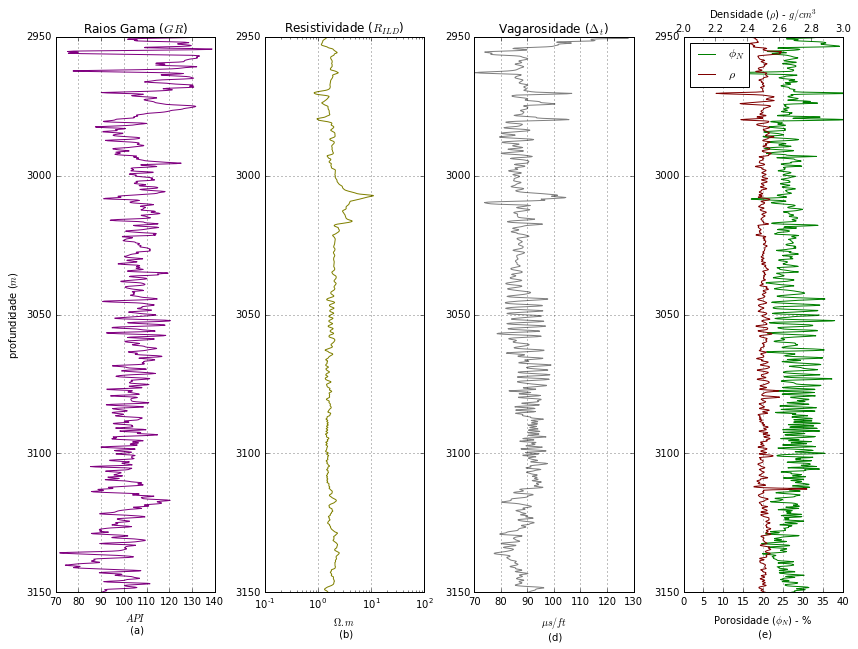

In [2]:
#-------------------------------------------------------Graficos--------------------------------------------------#
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)');ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$');ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')   
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2);ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

0.496265181279 media (IGR) - indice de raio gama
0.235787650483  media (VSH) - quantidade de folhelho 
2.65 RHOma| 1.101 RHOf 55.5 DTPm 189.0 DTPf

9.56541256748  media (PHItd)%
17.4247303876  media (PHIsh)%
1068  ponto de folhelho (Psh)
22.09737827715356 = porosidade sh tabelada| -6.18996197059 = porosidade sh calculada
8.19543913019 = porosidade D, tabelada| 11.4696756453 = porosidade D, calculada
19.1313077932 = porosidade S, tabelada| 26.3240673368 = porosidade, S calculada


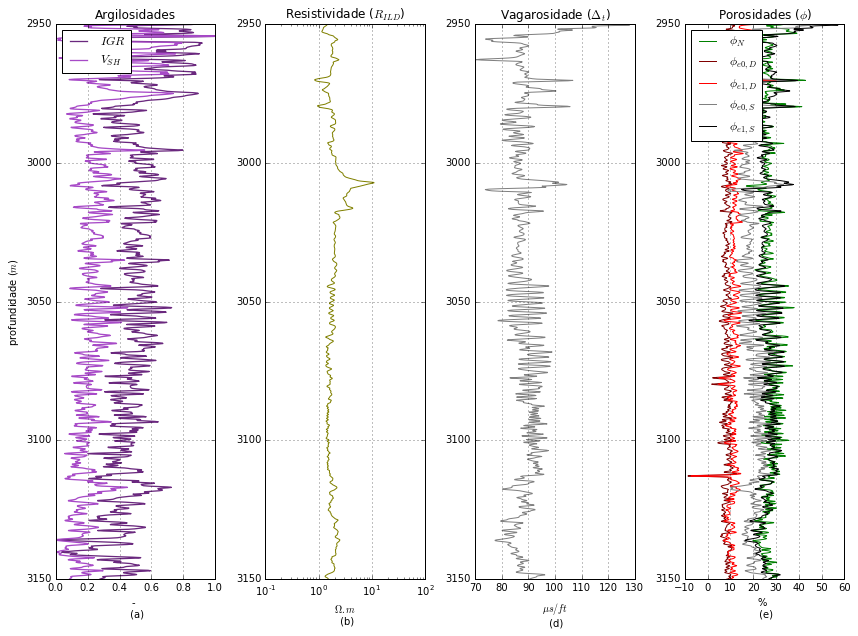

In [3]:
#
#Raio Gamma
#
IGR = [];VSH = []

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)       # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print(mean(IGR),'media (IGR) - indice de raio gama');print(mean(VSH),' media (VSH) - quantidade de folhelho ')
#
#Porosidade
#
RHOf  = 1.101;DTPf = 189.0;RHOma = 2.65;DTPma = 55.5;RHOsh = 2.56;DTPsh = 85.0
print (RHOma, 'RHOma|',RHOf,'RHOf',DTPma,'DTPm',DTPf,'DTPf')
#------------------------------------------------------------------------------------------------#
PHItd = [];PHIsh = [] # Porosidade total - perfil densidade e Porosidade aparente - folhelho

for i in range (p):
    PHItd0 = (100*(RHOb[i] - RHOma)/(RHOf - RHOma))# Porosidade total - perfil densidade
    PHIsh.append(PHIN[i] - PHItd0)
    PHItd.append(PHItd0)
print ();print (mean(PHItd),' media (PHItd)%');print (mean(PHIsh),' media (PHIsh)%')
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIsh):Psh = i
        
print (Psh,' ponto de folhelho (Psh)');RHOsh2 = RHOb[Psh];VPsh2  = 108.8*(RHOsh2**4.0)
DTPsh2 = 1.0/((3.2808*(10**(-6)))*VPsh2)
PHIs0  = 100.0*((DTPsh - DTPma)/(DTPf - DTPma));PHIs1 = 100.0*((DTPsh2  - DTPma)/(DTPf - DTPma))
print (PHIs0,'= porosidade sh tabelada|',PHIs1,'= porosidade sh calculada')
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIed0 = [];PHIed1 = []
for i in range (p):
    PHIed0.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh  - RHOma)/(RHOf - RHOma)))*100)
    PHIed1.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh2 - RHOma)/(RHOf - RHOma)))*100)
    
print (mean(PHIed0),'= porosidade D, tabelada|',mean(PHIed1),'= porosidade D, calculada')
#-----------------------------------------Porosidade Sonica--------------------------------------------------
PHIts = [];PHIes0 = [];PHIes1 = []

DTPsh = DTP[Psh]
for i in range (p):
    PHIts.append(((DTP[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes0.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh  - DTPma)/(DTPf - DTPma))))*100.00)
    PHIes1.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh2 - DTPma)/(DTPf - DTPma))))*100.00)
print (mean(PHIes0),'= porosidade S, tabelada|',mean(PHIes1),'= porosidade, S calculada')
#--------------------------------------------------------Graficos------------------------------------------------#
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
ax1.set_title(u'Argilosidades');ax1.set_xlabel('- \n (a)');ax1.set_ylabel('profundidade ($m$)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.invert_yaxis();ax1.grid();ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')    
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIed0,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e0,D}$')
ax5.plot(PHIed1,prof,'-',linewidth = 1,color='red',label='$\phi_{e1,D}$')
ax5.plot(PHIes0,prof,'-',linewidth = 1,color='Gray'  ,label='$\phi_{e0,S}$')
ax5.plot(PHIes1,prof,'-',linewidth = 1,color='Black' ,label='$\phi_{e1,S}$')
ax5.set_title('Porosidades ($\phi$)');ax5.set_xlabel('% \n (e)');ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis();ax5.grid();ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show();del(IGR)

<br><center><font face="Times New ROman" size="6" color="#000000">- Perfil Sônico Sintético (teste) -</font></center>
<br>
<br>
<br>Augusto 1 - $V_p(\phi_{e,D},V_{sh}) =  0.41 \rho b ^{2.32}$
<br>Augusto 2 - $V_p(\phi_{e,D},V_{sh}) = 3.90  - 5.07\phi_{e,D} - 0.39V_{sh} + 1.88 \times 10^{-2} R_{ILD}^2$

rP  = 0.371119094245 |mP  = 720.462740583 |stdP  = 244.833438201
rE1 = 0.496006558682 |mE1 = 127.967988917 |stdE1 = 115.155155218
rE2 = 0.485607047593 |mE2 = 130.580555692 |stdE2 = 113.965856794

rNA02 0.199043796903
rRJS19 0.3260072967
rNA07 0.189816834146
rNA12 0.222249208147
rNA04 0.235723851704
rRJS42 0.259238489557


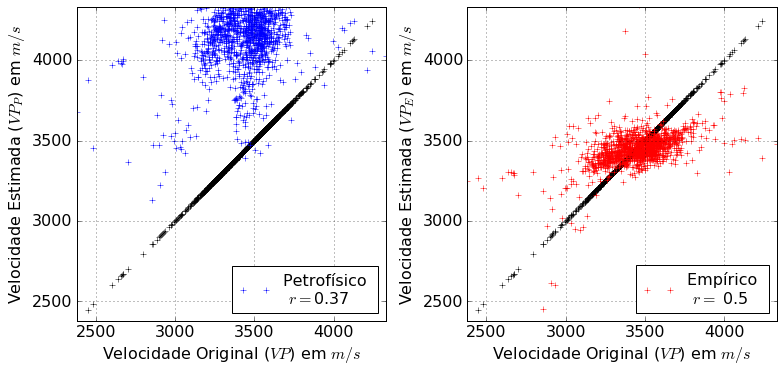

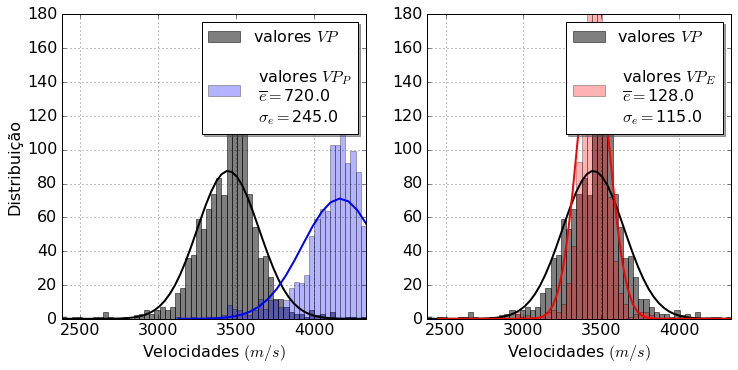

In [4]:
#---------------------------------------------------Estimando VP-------------------------------------------------#
cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))
#---------------------------------------------------------------
pet = u"- Petrofísico"; emp = u"- Empírico";petp = name1+pet;empp = name1+emp # nomeclatura
#------------------------------------------------Modelo Petrofisico----------------------------------------------#
DTPp = [];VPp=[];errorP = []
for i in range (p):
    DTPp0 = (DTPma + (DTPf - DTPma)*((PHIed0[i]/100.0)+(VSH[i]*(PHIs0/100.0))));DTPp.append(DTPp0)
    VPp0 = (1.00/(cfvp*DTPp0));errorP.append(abs(VP[i]-VPp0));VPp.append(VPp0)

print('rP  =',np.corrcoef(VP,VPp)[0,1],'|mP  =',np.mean(errorP),'|stdP  =',np.std(errorP))
#--------------------------------------------------Modelo Empirico-----------------------------------------------#
VPe1=[];VPe2=[];VPe_02=[];VPe_07=[];VPe_12=[];VPe_04=[];VPe_RJS42=[];VPe_RJS19=[];errorE1=[];errorE2=[]

for i in range (p): # determinando VPa em ms
    VPe01=(1000*(3.90 - (5.07*PHIed1[i]/100.0) + (0.39*VSH[i]) + (ILD[i]*1.88*(10**(-2)))));errorE1.append(abs(VP[i]-VPe01))
    VPe1.append(VPe01)
    
    VPe02=(1000*(0.41*(RHOb[i]**2.32)))
    errorE2.append(abs(VP[i]-VPe02));VPe2.append(VPe02)
    
    1000*(3.90 - (5.07*PHIed1[i]/100.0) + (0.39*VSH[i]) + (ILD[i]*1.88*(10**(-2))))
    
    VPe_02.append(1000*(4.29 - (2.66*PHIed1[i]/100.0) - (1.78*VSH[i]) - (5.38*ILD[i]*(10**(-5)))))
    VPe_07.append(1000*(4.84 - (8.43*PHIed1[i]/100.0) - (5.52*VSH[i]) + (18.78*(PHIed1[i]/100.0)*VSH[i]) 
    + (8.94*((PHIed1[i]/100)**2)) + (2.25*VSH[i]**2)))
    VPe_12.append(1000*(4.28 - (5.63*PHIed1[i]/100.0) - (2.74*VSH[i]) + (9.24*(PHIed1[i]/100.0)*VSH[i]) 
    + 6.76*(PHIed1[i]/100.0)**2 + (0.85*(VSH[i])**2)))
    VPe_04.append(1000*(4.80 - (8.20*PHIed1[i]/100.0) - (4.31*VSH[i]) + (12.72*(PHIed1[i]/100.0)*VSH[i]) 
    + (10.42*((PHIed1[i]/100)**2)) + (2.57*VSH[i]**2)))
    VPe_RJS42.append(1000*(3.89 -(5.11*(PHIed1[i]/100.0)) - (0.82*VSH[i]) + (0.07*ILD[i]) 
    + (1.11*(PHIed1[i]/100.0)*VSH[i]) - (0.35*(PHIed1[i]/100.0)*ILD[i]) + ((9.16*(10**(-3)))*(VSH[i])*ILD[i])
    + (15.40*((PHIed1[i]/100)**2)) + (0.23*(VSH[i]**2)) - ((7.29*(10**(-4)))*(ILD[i]**2))))
    VPe_RJS19.append(1000*(4.63 - (9.82*PHIed1[i]/100) - (2.25*VSH[i]) + (0.08*ILD[i]) 
    + (4.06*(PHIed1[i]/100)*VSH[i]) - (0.22*(PHIed1[i]/100)*ILD[i]) + (0.00192*(VSH[i])*ILD[i]) 
    + (17.18*((PHIed1[i]/100)**2))+ (1.26*((VSH[i])**2)) - (0.000266*((ILD[i])**2))))

print('rE1 =',np.corrcoef(VP,VPe1)[0,1],'|mE1 =',np.mean(errorE1),'|stdE1 =',np.std(errorE1))
print('rE2 =',np.corrcoef(VP,VPe2)[0,1],'|mE2 =',np.mean(errorE2),'|stdE2 =',np.std(errorE2));print();
print('rNA02',np.corrcoef(VP,VPe_02)[0,1]);print('rRJS19',np.corrcoef(VP,VPe_RJS19)[0,1]);
print('rNA07',np.corrcoef(VP,VPe_07)[0,1]);print('rNA12',np.corrcoef(VP,VPe_12)[0,1]);
print('rNA04',np.corrcoef(VP,VPe_04)[0,1]);print('rRJS42',np.corrcoef(VP,VPe_RJS42)[0,1])
#-----------------------------------------------------Graficos--------------------------------------------------#
fig = plt.figure(figsize= (11,10))

scatterP='Petrofísico \n $r=$'+str(round(np.corrcoef(VP,VPp)[0,1],2));
scatterE='Empírico \n $r =$ '+str(round(np.corrcoef(VP,VPe1)[0,1],2))

ax1=plt.subplot(221);ax1.plot(VP,VP,'+k');ax1.plot(VP,VPp,'+b',label=scatterP);legend=ax1.legend(loc=4,fontsize=16)
plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=max(VP),ymin=min(VP))
plt.xlabel('Velocidade Original ($VP$) em $m/s$',fontsize=16)
plt.ylabel('Velocidade Estimada ($VP_P$) em $m/s$',fontsize=16)
plt.grid()
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax2=plt.subplot(222);ax2.plot(VP,VP,'+k');ax2.plot(VP,VPe1,'+r',label=scatterE)
legend=ax2.legend(loc=4,fontsize=16)
plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=max(VP),ymin=min(VP));
plt.xlabel('Velocidade Original ($VP$) em $m/s$',fontsize=16)
plt.ylabel('Velocidade Estimada ($VP_E$) em $m/s$',fontsize=16);plt.grid()
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
fig.tight_layout()

plt.show();name_sca_0 = '../../mario_tese/Figs/pocos/na'+name0+'scatterplot.png'
fig.savefig(name_sca_0, dpi=100, transparent=True, bbox_inches='tight')
#----------------------------------------------------Histograma-------------------------------------------------#
bins_s=60;bins_vp = np.linspace(min(VP), max(VP), bins_s)

label_hist_e = '\n valores $VP_E$ \n $\overline{e} =$'+str(round(np.mean(errorE1))) \
+'\n $\sigma_e =$'+str(round(np.std(errorE1)));label_hist_p = '\n valores $VP_P$ \n $\overline{e} =$' \
+str(round(np.mean(errorP)))+'\n $\sigma_e =$'+str(round(np.std(errorP)))
#-----------------------------------------------------------------------------------------------------#
X_VP  = np.linspace(min(VP), max(VP),bins_s)
dx_VP = np.histogram(VP ,bins=bins_vp)[1][1] - np.histogram(VP ,bins=bins_vp)[1][0]
Y_VP  = mlab.normpdf(np.linspace(min(VP),max(VP),bins_s),np.mean(VP),np.sqrt(np.var(VP)))*len(VP)*dx_VP
#-------------------------------------------------------------------------------------------------------------#
X_VPe  = np.linspace(min(VPe1), max(VPe1),bins_s)
dx_VPe = np.histogram(VPe1,bins=bins_vp)[1][1] - np.histogram(VPe1 ,bins=bins_vp)[1][0]
Y_VPe  = mlab.normpdf(np.linspace(min(VPe1),max(VPe1),bins_s),np.mean(VPe1),np.sqrt(np.var(VPe1)))*len(VPe1)*dx_VPe
#-------------------------------------------------------------------------------------------------------------#
X_VPp  = np.linspace(min(VPp), max(VPp),bins_s)
dx_VPp = np.histogram(VPp ,bins=bins_vp)[1][1] - np.histogram(VPp ,bins=bins_vp)[1][0]
Y_VPp  = mlab.normpdf(np.linspace(min(VPp),max(VPp),bins_s),np.mean(VPp),np.sqrt(np.var(VPp)))*len(VPp)*dx_VPp
#-------------------------------------------------------------------------------------------------------------#
fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.hist(VP,bins_vp,histtype='bar',stacked=True,color='k',alpha=0.5,label='valores $VP$')
ax1.plot(X_VP,Y_VP,linewidth=2,color='k')
ax1.hist(VPp , bins_vp, histtype='bar', stacked=True, color='b', alpha=0.3,label=label_hist_p)
ax1.plot(X_VPp,Y_VPp,linewidth = 2, color='b')
plt.xlabel('Velocidades $(m / s)$',fontsize=16);plt.ylabel('Distribuição',fontsize=16);plt.grid()
plt.xlim(xmax=max(VP),xmin=min(VP));
plt.ylim(ymax=180,ymin=0);legend = ax1.legend(loc=1, shadow=True,fontsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax2 = plt.subplot(222)
ax2.hist(VP , bins_vp, histtype='bar', stacked=True, color='k', alpha=0.5,label='valores $VP$')
ax2.plot(X_VP ,Y_VP ,linewidth = 2, color='k')
ax2.hist(VPe1 , bins_vp, histtype='bar', stacked=True, color='r', alpha=0.3,label=label_hist_e)
ax2.plot(X_VPe,Y_VPe,linewidth = 2, color='r')
plt.xlabel('Velocidades $(m / s)$',fontsize=16);plt.grid();plt.xlim(xmax=max(VP),xmin=min(VP))
plt.ylim(ymax=180,ymin=0)
legend = ax2.legend(loc=1, shadow=True,fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

plt.show();name_hist_0 = '../../mario_tese/Figs/pocos/na'+name0+'histograma.png'
fig.savefig(name_hist_0, dpi=100, transparent=True, bbox_inches='tight')
del(name_hist_0,X_VP,X_VPe,X_VPp,dx_VP,dx_VPe,dx_VPp,Y_VP,Y_VPe,Y_VPp,label_hist_e,label_hist_p)

[  55.5027737   189.00267608    2.88904365    1.33162975]


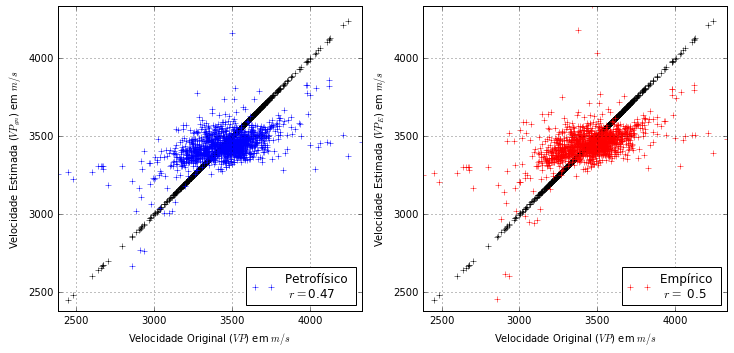

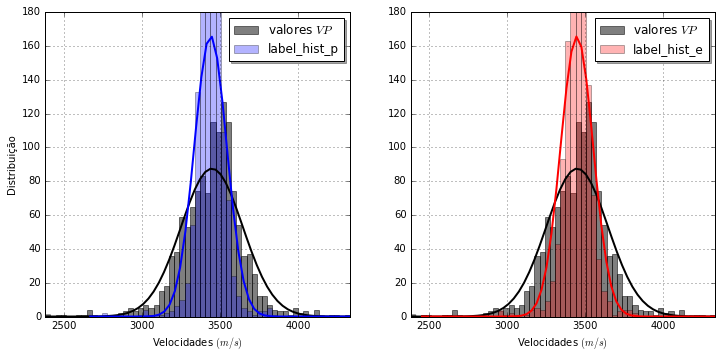

In [5]:
#
#Gauss-Newton
#
I4 = 1*np.identity(4);C = [55.500,189.000,2.650,1.101];CCC = [];III = [];valx = [];valy = []
for i in range (100):

    AA = [];BB = [];CC = [];DD = [];r  = []
    for i in range (p):
        AA.append( (RHOb[i] - C[3])/(C[2] - C[3]) );BB.append( (C[2] - RHOb[i])/(C[2] - C[3]) )
        CC.append( (C[0]-C[1])*(C[3]-RHOb[i])/(C[2] - C[3])**2 )
        DD.append( -(C[0]-C[1])*(C[2]-RHOb[i])/(C[2] - C[3])**2 )
        r.append(DTP[i] - (C[0] + (C[1] - C[0])*((RHOb[i] - C[2])/(C[3] - C[2]))))

    MM = [AA,BB,CC,DD]
    MT = np.transpose(MM)
    MMM = np.dot(MM,np.transpose(MM)) + I4
    
    MMI = np.linalg.inv(MMM)
    C1 = C + np.dot(MMI,np.dot(r,MT))
    #print (np.linalg.det(MMM))
    C = C1
    #print (C1)
    CCC.append(C1)
    III.append(i)
    
print (C1);DTPgn = [];VPgn = []
for i in range (p):
    DTPgn0 = ((C[0] + (C[1] - C[0])*((RHOb[i] - C[2])/(C[3] - C[2]))))
    DTPgn.append(DTPgn0);VPgn.append(1.0000/(cfvp*DTPgn0))
#-----------------------------------------------------------------------------------------------------#
fig = plt.figure(figsize= (12,12))

scatterPgn=u'Petrofísico \n $r=$'+str(round(np.corrcoef(VP,VPgn)[0,1],2));
scatterE=u'Empírico \n $r =$ '+str(round(np.corrcoef(VP,VPe1)[0,1],2))

ax1=plt.subplot(221);ax1.plot(VP,VP,'+k');ax1.plot(VP,VPgn,'+b',label=scatterPgn);legend=ax1.legend(loc=4)
plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=max(VP),ymin=min(VP))
plt.xlabel('Velocidade Original ($VP$) em $m/s$');plt.ylabel('Velocidade Estimada ($VP_{gn}$) em $m/s$');plt.grid()

ax2=plt.subplot(222);ax2.plot(VP,VP,'+k');ax2.plot(VP,VPe1,'+r',label=scatterE);legend=ax2.legend(loc=4)
plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=max(VP),ymin=min(VP));
plt.xlabel('Velocidade Original ($VP$) em $m/s$');plt.ylabel('Velocidade Estimada ($VP_E$) em $m/s$');plt.grid()

plt.show();
#----------------------------------------------------Histograma-------------------------------------------------#
#label_hist_e = '\n valores $VP_E$ \n $\overline{e} =$'+str(round(np.mean(errorE1))) \
#+'\n $\sigma_e =$'+str(round(np.std(errorE1)));label_hist_p = '\n valores $VP_P$ \n $\overline{e} =$' \
#+str(round(np.mean(errorP)))+'\n $\sigma_e =$'+str(round(np.std(errorP)))
#-----------------------------------------------------------------------------------------------------#
X_VP  = np.linspace(min(VP), max(VP),bins_s)
dx_VP = np.histogram(VP ,bins=bins_vp)[1][1] - np.histogram(VP ,bins=bins_vp)[1][0]
Y_VP  = mlab.normpdf(np.linspace(min(VP),max(VP),bins_s),np.mean(VP),np.sqrt(np.var(VP)))*len(VP)*dx_VP
#-------------------------------------------------------------------------------------------------------------#
X_VPe  = np.linspace(min(VPe1), max(VPe1),bins_s)
dx_VPe = np.histogram(VPe1,bins=bins_vp)[1][1] - np.histogram(VPe1 ,bins=bins_vp)[1][0]
Y_VPe  = mlab.normpdf(np.linspace(min(VPe1),max(VPe1),bins_s),np.mean(VPe1),np.sqrt(np.var(VPe1)))*len(VPe1)*dx_VPe
#-------------------------------------------------------------------------------------------------------------#
X_VPp  = np.linspace(min(VPgn), max(VPgn),bins_s)
dx_VPp = np.histogram(VPgn ,bins=bins_vp)[1][1] - np.histogram(VPgn ,bins=bins_vp)[1][0]
Y_VPp  = mlab.normpdf(np.linspace(min(VPgn),max(VPgn),bins_s),np.mean(VPgn),np.sqrt(np.var(VPgn)))*len(VPgn)*dx_VPp
#-------------------------------------------------------------------------------------------------------------#
fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.hist(VP,bins_vp,histtype='bar',stacked=True,color='k',alpha=0.5,label='valores $VP$')
ax1.plot(X_VP,Y_VP,linewidth=2,color='k')
ax1.hist(VPgn , bins_vp, histtype='bar', stacked=True, color='b', alpha=0.3,label='label_hist_p')
ax1.plot(X_VPp,Y_VPp,linewidth = 2, color='b')
plt.xlabel('Velocidades $(m / s)$');plt.ylabel(u'Distribuição');plt.grid();plt.xlim(xmax=max(VP),xmin=min(VP));
plt.ylim(ymax=180,ymin=0);legend = ax1.legend(loc=1, shadow=True)

ax2 = plt.subplot(222)
ax2.hist(VP , bins_vp, histtype='bar', stacked=True, color='k', alpha=0.5,label='valores $VP$')
ax2.plot(X_VP ,Y_VP ,linewidth = 2, color='k')
ax2.hist(VPe1 , bins_vp, histtype='bar', stacked=True, color='r', alpha=0.3,label='label_hist_e')
ax2.plot(X_VPe,Y_VPe,linewidth = 2, color='r')
plt.xlabel('Velocidades $(m / s)$');plt.grid();plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=180,ymin=0)
legend = ax2.legend(loc=1, shadow=True)

plt.show();name_hist_0 = '../../mario_tese/Figs/pocos/na'+name0+'histograma.png'
fig.savefig(name_hist_0, dpi=100, transparent=True, bbox_inches='tight')
del(name_hist_0,X_VP,X_VPe,X_VPp,dx_VP,dx_VPe,dx_VPp,Y_VP,Y_VPe,Y_VPp)

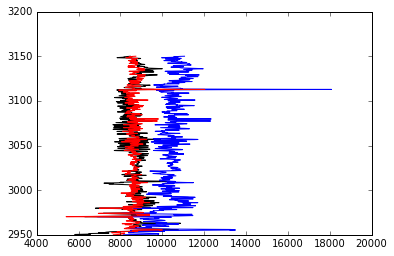

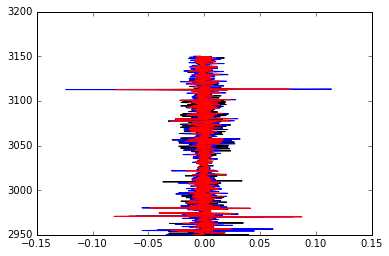

In [6]:
#--------------------------------------Impedancia---(transformado de pe pra m)-----------------------------------#
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)
#------------------------------------------------------Impedancia Acustica---------------------------------------#
z_imp = [];z_imp_e = [];z_imp_p = [] # Impedancias acusticas(m/s).(g/cm3)
Z = [];Ze = [];Zp = [] # Impedancias acusticas (Km/s).(g/cm3)

for i in range (p):
    z_imp0 = (RHOsi[i]*VP  [i]);z_imp.append(z_imp0);Z.append(z_imp0*1000.000)
    z_imp0e= (RHOsi[i]*VPe1[i]);z_imp_e.append(z_imp0e);Ze.append(z_imp0e*1000.000)
    z_imp0p= (RHOsi[i]*VPp [i]);z_imp_p.append(z_imp0p);Zp.append(z_imp0p*1000.000)
    #------------------------------------------------------------------------------------------------------------#
plt.plot(Z ,prof,'-k',linewidth = 1);plt.plot(Zp,prof,'-b',linewidth = 1);plt.plot(Ze,prof,'-r',linewidth = 1);
plt.show()
#-----------------------------------------------Refletividades---------------------------------------------------#
R = [];Rp = [];Re = [] # Refletividades

for i in range (p):
    if i == 0:
        RR = 0;RRp= 0;RRe= 0
    if i != 0:
        RR = (z_imp[i-1] - z_imp[i])/(z_imp[i-1] + z_imp[i])
        RRp= (z_imp_p[i-1] - z_imp_p[i])/(z_imp_p[i-1] + z_imp_p[i])
        RRe= (z_imp_e[i-1] - z_imp_e[i])/(z_imp_e[i-1] + z_imp_e[i])
    R.append(RR);Rp.append(RRp);Re.append(RRe)
    
zero_bar = [0]*p
#-------------------------------------------------------------------------------------------------------------#
plt.plot(R ,prof,'-k',linewidth = 1);plt.plot(Rp,prof,'-b',linewidth = 1);
plt.plot(Re,prof,'-r',linewidth = 1);plt.show()

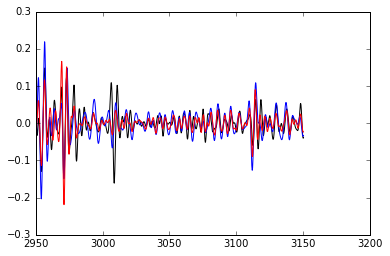

In [7]:
#----------------------------------------------Amplitude Sismica--------------------------------------------------#
DL = prof[3]-prof[2];To = [];Tp = [];Te = [];f = 600

for i in range (p):
    To.append(DL/VP[i]);Tp.append(DL/VPp[i]);Te.append(DL/VPe1[i])
    
TTT = np.cumsum(To);TTP = np.cumsum(Tp);TTE = np.cumsum(Te)

signal = []
for j in range (p):
    wavk = []
    for i in range (len(TTT)):
        EE1 = -(np.pi**2)*(f**2)*((TTT[j] - TTT[i])**2)
        wav0 = R[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTT[j] - TTT[i])**2))*np.exp(EE1);wavk.append(wav0)
    FXO1 = np.sum(wavk)
    signal.append(FXO1)
    
signalp = []
for j in range (p):
    wavkp = []
    for i in range (len(TTP)):
        EE1p = -(np.pi**2)*(f**2)*((TTP[j] - TTP[i])**2)
        wav0p = Rp[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTP[j] - TTP[i])**2))*np.exp(EE1p);wavkp.append(wav0p)
    FXO1p = np.sum(wavkp)
    signalp.append(FXO1p)
    
signale = []
for j in range (p):
    wavke = []
    for i in range (len(TTE)):
        EE1e = -(np.pi**2)*(f**2)*((TTE[j] - TTE[i])**2)
        wav0e = Re[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTE[j] - TTE[i])**2))*np.exp(EE1e);wavke.append(wav0e)
    FXO1e = np.sum(wavke)
    signale.append(FXO1e)
    
plt.plot(prof,signal ,'-k');plt.plot(prof,signalp,'-b');plt.plot(prof,signale,'-r');plt.show()

In [8]:
#------------------------diferenca velocidades--------------------------#
difVPVPe = [];difVPVPp = [];relVPVPe = [];relVPVPp = []

for i in range (p):
    difVPVPe.append(np.sqrt((VPe1[i] - VP[i])**2));difVPVPp.append(np.sqrt((VPp[i] - VP[i])**2))
    relVPVPe.append(100.0*np.sqrt((((VP[i] - VPe1[i])/VP[i]))**2))
    relVPVPp.append(100.0*np.sqrt((((VP[i] - VPp[i])/VP[i]))**2))
RV = 2 # valor de arredondamento
#---------------------------------Medidas-Estatisticas------------------------------------#
medVP=round(np.mean(VP),RV);maxVP=round(max(VP),RV);minVP=round(min(VP),RV);varVP=round(np.var(VP),RV)
stdVP=round(np.std (VP),RV)
#----------------------------------------------#
print ("-----------valores de VP-------------");print (medVP,"m/s   - media ");print (maxVP,"m/s   - valor maximo")
print (minVP,"m/s   - valor minimo");print (varVP,"m²/s² - variancia");print (stdVP,"m/s   - desvio padrao")
print ("-------------------------------------")
#----------------------------------------------#
medVPe = round(np.mean(VPe1),RV);maxVPe = round(max(VPe1),RV);minVPe = round(min(VPe1),RV)
varVPe = round(np.var (VPe1),RV);stdVPe = round(np.std (VPe1),RV)
#----------------------------------------------#
print ("-----------valores de VPa------------");print (medVPe,"m/s   - media ");print (maxVPe,"m/s   - valor maximo")
print (minVPe,"m/s   - valor minimo");print (varVPe,"m²/s² - variancia");print (stdVPe,"m/s   - desvio padrao")
print ("-------------------------------------")
#----------------------------------------------#
medVPp = round(np.mean(VPp),RV);maxVPp = round(max(VPp),RV);minVPp = round(min(VPp),RV)
varVPp = round(np.var (VPp),RV);stdVPp = round(np.std (VPp),RV)
#----------------------------------------------#
print ("-----------valores de VPs------------");print (medVPp,"m/s   - media ");print (maxVPp,"m/s   - valor maximo")
print (minVPp,"m/s   - valor minimo");print (varVPp,"m²/s² - variancia");print (stdVPp,"m/s   - desvio padrao")
print ("-------------------------------------");print;print ("------------Erro Absoluto------------")
medeaVPVPe=round(np.mean(difVPVPe),RV);maxeaVPVPe = round(max(difVPVPe),RV);mineaVPVPe=round(min(difVPVPe),RV)
vareaVPVPe = round(np.var (difVPVPe),RV);stdeaVPVPe = round(np.std (difVPVPe),RV)
#----------------------------------------------#
print ("---------valores de eaVPVPa----------");print (medeaVPVPe,"m/s   - media ")
print (maxeaVPVPe,"m/s   - valor maximo");print (mineaVPVPe,"m/s   - valor minimo")
print (vareaVPVPe,"m²/s² - variancia");print (stdeaVPVPe,"m/s   - desvio padrao")
print ("-------------------------------------")
medeaVPVPp = (round(np.mean(difVPVPp),RV));maxeaVPVPp = (round(max(difVPVPp),RV))
mineaVPVPp = (round(min(difVPVPp),RV));vareaVPVPp = (round(np.var (difVPVPp),RV))
stdeaVPVPp = (round(np.std (difVPVPp),RV))
#----------------------------------------------#
print ("---------valores de eaVPVPs----------");print (medeaVPVPp,"m/s   - media ")
print (maxeaVPVPp,"m/s   - valor maximo");print (mineaVPVPp,"m/s   - valor minimo")
print (vareaVPVPp,"m²/s² - variancia");print (stdeaVPVPp,"m/s   - desvio padrao")
print ("-------------------------------------");print();print ("------------Erro relativo------------")
mederVPVPe = round(np.mean(relVPVPe),RV);maxerVPVPe = round(max(relVPVPe),RV)
minerVPVPe = round(min(relVPVPe),RV);varerVPVPe = round(np.var (relVPVPe),RV)
stderVPVPe = round(np.std (relVPVPe),RV)
#----------------------------------------------#
print ("---------valores de erVPVPa----------");print (mederVPVPe,"m/s   - media ")
print (maxerVPVPe,"m/s   - valor maximo");print (minerVPVPe,"m/s   - valor minimo")
print (varerVPVPe,"m²/s² - variancia");print (stderVPVPe,"m/s   - desvio padrao")
print ("-------------------------------------")
mederVPVPp = round(np.mean(relVPVPp),RV);maxerVPVPp = round(max(relVPVPp),RV)
minerVPVPp = round(min(relVPVPp),RV);varerVPVPp = round(np.var (relVPVPp),RV)
stderVPVPp = round(np.std (relVPVPp),RV)
#----------------------------------------------#
print ("---------valores de erVPVPs----------");print (mederVPVPp,"m/s   - media ")
print (maxerVPVPp,"m/s   - valor maximo");print (minerVPVPp,"m/s   - valor minimo")
print (varerVPVPp,"m²/s² - variancia");print (stderVPVPp,"m/s   - desvio padrao")
print ("-------------------------------------")

TAB1 = 'Valores de $V_P$ & ';TAB2 = 'Valores de $V_{P,E}$ & ';TAB3 = 'Valores de $V_{P,P}$ & '
TAB4 = 'Erro Absoluto $|V_P - V_{P,E}|$ & '+str(medeaVPVPe);TAB5 = 'Erro Absoluto $|V_P - V_{P,P}|$ & '+str(medeaVPVPp)
TAB6 = 'Erro Relativo $\\frac{|V_P - V_{P,E}|}{V_P}$ & ';TAB7 = 'Erro Relativo $\\frac{|V_P - V_{P,P}|}{V_P}$ & '

print ('\\begin{table}[]')
print ('\centering')
print ('\caption{Medidas Estatísticas do Poço NA-'+name0+'}')
print ('\label{estna'+name0+'}')
print ('\\begin{tabular}{|l|l|l|l|l|l|}')
print ('\hline')
print ('& média & valor máximo & valor mínimo & variância & desvio padrão \\\ \hline')
print (TAB1+str(medVP)+' & '+str(maxVP)+' & '+str(minVP)+' & '+str(varVP)+' & '+str(stdVP)+' \\\ \hline')
print (TAB2+str(medVPe)+' & '+str(maxVPe)+' & '+str(minVPe)+' & '+str(varVPe)+' & '+str(stdVPe)+' \\\ \hline')
print (TAB3+str(medVPp)+' & '+str(maxVPp)+' & '+str(minVPp)+' & '+str(varVPp)+' & '+str(stdVPp)+' \\\ \hline')
print (TAB4+' & '+str(maxeaVPVPe)+' & '+str(mineaVPVPe)+' & '+str(vareaVPVPe)+' & '+str(stdeaVPVPe)+' \\\ \hline')
print (TAB5+' & '+str(maxeaVPVPp)+' & '+str(mineaVPVPp)+' & '+str(vareaVPVPp)+' & '+str(stdeaVPVPp)+' \\\ \hline')
print (TAB6+str(mederVPVPe)+'&'+str(maxerVPVPe)+'&'+str(minerVPVPe)+'&'+str(varerVPVPe)+'&'+str(stderVPVPe)+'\\\ \hline')
print (TAB7+str(mederVPVPp)+'&'+str(maxerVPVPp)+'&'+str(minerVPVPp)+'&'+str(varerVPVPp)+'&'+str(stderVPVPp)+'\\\ \hline')
print ('\end{tabular}')
print ('\end{table}')

-----------valores de VP-------------
3448.47 m/s   - media 
4332.34 m/s   - valor maximo
2379.93 m/s   - valor minimo
39249.74 m²/s² - variancia
198.12 m/s   - desvio padrao
-------------------------------------
-----------valores de VPa------------
3446.85 m/s   - media 
4338.95 m/s   - valor maximo
2452.6 m/s   - valor minimo
10946.72 m²/s² - variancia
104.63 m/s   - desvio padrao
-------------------------------------
-----------valores de VPs------------
4166.94 m/s   - media 
6517.11 m/s   - valor maximo
3129.47 m/s   - valor minimo
59412.51 m²/s² - variancia
243.75 m/s   - desvio padrao
-------------------------------------
------------Erro Absoluto------------
---------valores de eaVPVPa----------
127.97 m/s   - media 
873.73 m/s   - valor maximo
0.66 m/s   - valor minimo
13260.71 m²/s² - variancia
115.16 m/s   - desvio padrao
-------------------------------------
---------valores de eaVPVPs----------
720.46 m/s   - media 
3051.89 m/s   - valor maximo
3.62 m/s   - valor minimo
5

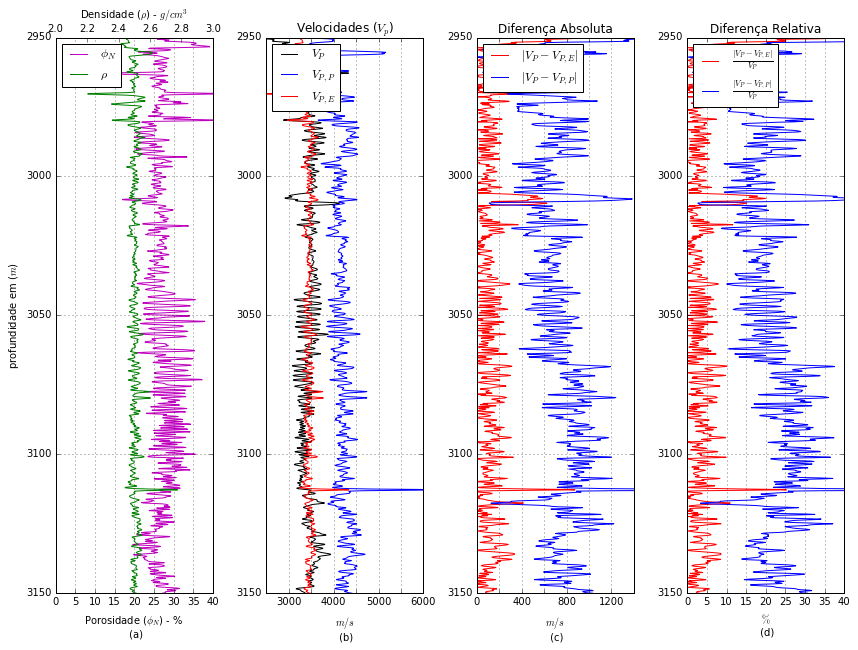

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
lab1 = ax1.plot(PHIN,prof,'-m',linewidth = 1,label='$\phi_N$');ax1.set_xlabel('Porosidade ($\phi_N$) - % \n (a)')
ax1.set_ylabel('profundidade em ($m$)');ax0 = ax1.twiny()
lab0 = ax0.plot(RHOb,prof,'-g',linewidth = 1,label='$\\rho$');ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')
labf = lab1+lab0;labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2)
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax0.set_xlim(xmax=3.0,xmin=2.0);ax1.set_xlim(xmax=40.0,xmin=0.0)
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.plot(VP,prof,'-k',linewidth = 1,label='$V_P$');ax2.plot(VPp,prof,'-b',linewidth = 1,label='$V_{P,P}$')
ax2.plot(VPe1,prof,'-r',linewidth = 1,label='$V_{P,E}$');ax2.set_title('Velocidades ($V_p$)')                      
ax2.set_xlabel('$m/s$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.set_xlim(xmax=6000,xmin=2500)
ax2.invert_yaxis();ax2.grid();ax2.legend(loc=2);ax2.set_xticklabels([" ",3000," ",4000," ",5000," ",6000])
#--------------------------------------------------------------------------------------------------#
ax3.plot(difVPVPe,prof,'-r',linewidth = 1,label='$|V_P - V_{P,E}|$') # augusto
ax3.plot(difVPVPp,prof,'-b',linewidth = 1,label='$|V_P - V_{P,P}|$') # siqueira
ax3.set_title(u'Diferença Absoluta');ax3.set_xlabel('$m/s$ \n (c)');ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=1400,xmin=0);ax3.invert_yaxis();ax3.grid()
ax3.set_xticklabels([0,   " ",   400,   " ",   800,  " ",  1200,  " "]);ax3.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax4.plot(relVPVPe,prof,'-r',linewidth = 1,label='$\\frac{|V_P - V_{P,E}|}{V_P}$') # augusto
ax4.plot(relVPVPp,prof,'-b',linewidth = 1,label='$\\frac{|V_P - V_{P,P}|}{V_P}$') # siqueira
ax4.set_title(u'Diferença Relativa');ax4.set_xlabel('$\%$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=40,xmin=0);ax4.invert_yaxis();ax4.grid();ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()
name_a = '../../mario_tese/Figs/pocos/RJS'+name0+'perfil1.png'
fig.savefig(name_a, dpi=100, transparent=True, bbox_inches='tight')

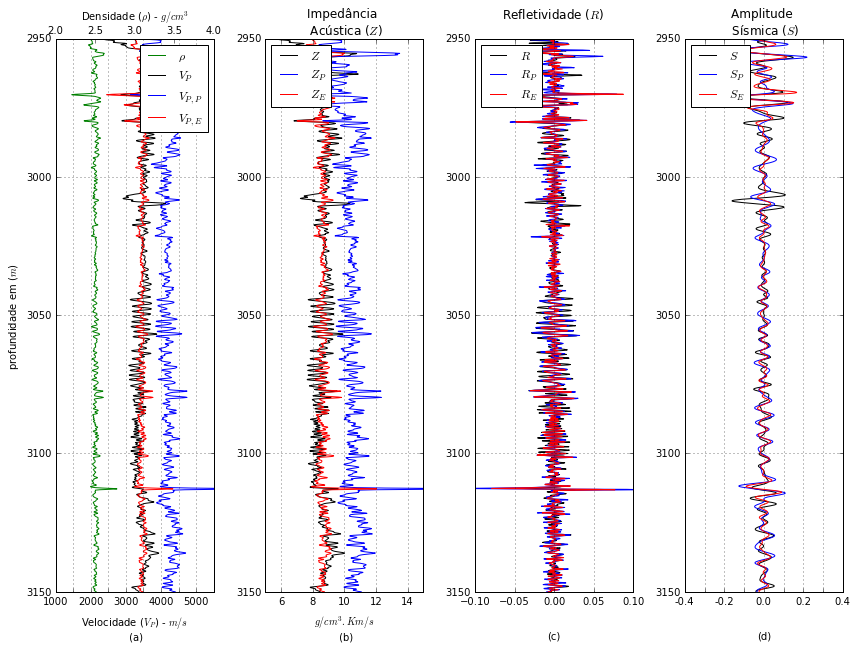

In [10]:
#--------------------------------------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
lab1=ax1.plot(PHIN,prof,'-k',linewidth=1,label='$\phi_N$')
lab1=ax1.plot(VP ,prof,'-k',linewidth =1,label='$V_P$')
lab2=ax1.plot(VPp,prof,'-b',linewidth =1,label='$V_{P,P}$')
lab3=ax1.plot(VPe1,prof,'-r',linewidth=1,label='$V_{P,E}$');ax1.set_ylabel('profundidade em ($m$)');ax0=ax1.twiny()

lab0 = ax0.plot(RHOb,prof,'-g',linewidth = 1,label='$\\rho$');ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')
ax1.set_xlabel('Velocidade ($V_P$) - $m/s$ \n (a)');labf = lab0+lab1+lab2+lab3;labs=[l.get_label()for l in labf]
plt.legend(labf, labs, loc=0);ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.set_xlim(xmax=5500,xmin=1000)
ax0.set_xlim(xmax=4,xmin=2);ax1.invert_yaxis();ax1.grid()
ax1.set_xticklabels([1000," ",2000," ",3000," ",4000," ",5000," "])
#--------------------------------------------------------------------------------------------------#
ax2.plot(z_imp  ,prof,'-k',linewidth = 1,label='$Z$')
ax2.plot(z_imp_p,prof,'-b',linewidth = 1,label='$Z_{P}$')
ax2.plot(z_imp_e,prof,'-r',linewidth = 1,label='$Z_{E}$')         

ax2.set_title(u'Impedância \n Acústica ($Z$)');ax2.set_xlabel('$g/cm^3 . Km/s$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.set_xlim(xmax=15,xmin=5);ax2.invert_yaxis();ax2.grid()
ax2.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax3.plot(R ,prof,'-k',linewidth = 1,label='$R$') ;ax3.plot(Rp,prof,'-b',linewidth = 1,label='$R_{P}$') 
ax3.plot(Re,prof,'-r',linewidth = 1,label='$R_{E}$');ax3.set_title('Refletividade ($R$) \n')
ax3.set_xlabel('(c)');ax3.xaxis.set_label_coords(0.5, -0.07);ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.1,xmin=-0.1);ax3.invert_yaxis();ax3.grid();ax3.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax4.plot(signal ,prof,'-k',linewidth = 1,label='$S$') ;ax4.plot(signalp,prof,'-b',linewidth = 1,label='$S_P$')
ax4.plot(signale,prof,'-r',linewidth = 1,label='$S_E$');ax4.set_title(u'Amplitude \n Sísmica ($S$)')
ax4.set_xlabel('(d)');ax4.xaxis.set_label_coords(0.5, -0.07);ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4);ax4.invert_yaxis();ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])
ax4.grid();ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#

plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

name_b = '../../mario_tese/Figs/pocos/RJS'+name0+'perfil2.png';transparent=True
fig.savefig(name_b, dpi=100, transparent=True, bbox_inches='tight')

In [11]:
X = [355387]*p
Y = [7516362]*p

#-----------Nota: caso o sonico nao exista, os valores de augusto e siqueira sao os originais.
#-----------Caso contrario, sao os modelos testados

filef = np.array([[-999.000]*14]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof   # profundidade
filef[:,3] = DTP    # sonico 
filef[:,4] = GR     # gama ray
filef[:,5] = ILD    # resistividade
filef[:,6] = PHIN   # porosidade neutronica
filef[:,7] = RHOb   # densidade

#----------------Siqueira----------------------#

filef[:,8] = z_imp  # Impedancia acustica
filef[:,9] = R      # Refletividade
filef[:,10] = signal # Sismograma sintetico

#----------------Augusto-----------------------#

filef[:,11]= z_imp  # Impedancia acustica
filef[:,12]= R      # Refletividade
filef[:,13]= signal # Sismograma sintetico

np.savetxt('../banco_de_dados_mario/na37_mario.dat', filef, delimiter=' ', fmt='%.4f')